In [18]:
"""
@author: Tugba Eraslanoglu

Checking the data to map event area coordinates 

"""

import pandas as pd
import geopandas as gpd
import folium
from pyproj import CRS

In [22]:
#Load the data and read
#data_file = "ACLED_newspaperdata.csv"
data_file = "newspaperdata.csv"
#df = pd.read_csv(data_file, delimiter=';')
df = pd.read_csv(data_file, sep='\t')
df.head()

Unnamed: 0  event_id  event_date  year  month   disorder_type event_type  \
0           1  DEU20172  2024-02-16  2024      2  Demonstrations   Protests   
1           2  DEU20173  2024-02-16  2024      2  Demonstrations   Protests   
2           3  DEU20104  2024-02-15  2024      2  Demonstrations   Protests   
3           4  DEU20126  2024-02-15  2024      2  Demonstrations   Protests   
4           5  DEU20100  2024-02-14  2024      2  Demonstrations   Protests   

              sub_event_type                actor1              assoc_actor_1  \
0           Peaceful protest  Protesters (Germany)                        NaN   
1           Peaceful protest  Protesters (Germany)                        NaN   
2  Protest with intervention  Protesters (Germany)  Last Generation (Germany)   
3           Peaceful protest  Protesters (Germany)      Labor Group (Germany)   
4  Protest with intervention  Protesters (Germany)                        NaN   

   ...  population_5km population_best crowd_size_class  crowd_size_cat  \
0  ...          138680           23736                3             NaN   
1  ...          138680           23736                6             NaN   
2  ...          138680           23736                1             NaN   
3  ...          138680           23736                0             NaN   
4  ...          127378           11620                4             NaN   

   crowd_size crowd_size_w_n with_vehicles    ?  split  \
0       100.0          100.0           NaN  NaN    NaN   
1      1020.0         1020.0           NaN  NaN    NaN   
2         3.0            3.0           NaN  NaN    NaN   
3       200.0            NaN           NaN  NaN    NaN   
4       280.0          280.0           NaN  NaN    NaN   

                                             notes11  
0  about 100 climate activists participated in a ...  
1  in the evening, about 1,000 people participate...  
2  3 Last Generation activists protested in the F...  
3  actors and directors protested in Berlin - Mit...  
4  in the evening, about 230 pro-Palestine demons...  

[5 rows x 40 columns]

In [23]:
# Check the columns of the data
df.columns

Index(['Unnamed: 0', 'event_id', 'event_date', 'year', 'month',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'admin2', 'location', 'latitude',
       'longitude', 'source', 'source_scale', 'label', 'class', 'notes22',
       'notes', 'fatalities', 'timestamp', 'population_1km', 'population_2km',
       'population_5km', 'population_best', 'crowd_size_class',
       'crowd_size_cat', 'crowd_size', 'crowd_size_w_n', 'with_vehicles', '?',
       'split', 'notes11'],
      dtype='object')

In [24]:
# Check the unique longitutude values of the data
df['longitude'].unique()

array([13.4024, 13.4403, 13.4354, 13.3738, 13.2317, 13.5876, 13.4951,
       13.2639, 13.3459, 13.4105, 13.6006, 13.4031, 13.198 ])

In [25]:
# Check the unique latitude values of the data
df['latitude'].unique()

array([52.5177, 52.501 , 52.481 , 52.4406, 52.428 , 52.5223, 52.5197,
       52.5079, 52.5711, 52.5244, 52.4175, 52.566 , 52.5356])

In [26]:
df['longitude'] = pd.to_numeric(df['longitude'])
df['latitude'] = pd.to_numeric(df['latitude'])

In [27]:
# Create a new GeoDataFrame
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))


In [28]:
# Set the CRS to WGS84 (EPSG:4326)
df_geo.crs = CRS("EPSG:4326")

In [29]:
# Create a Folium map centered around the mean latitude and longitude
osm_map = folium.Map(location=[df_geo['latitude'].mean(), df_geo['longitude'].mean()], zoom_start=4)

In [30]:
# Convert the GeoDataFrame to GeoJSON format
points = folium.features.GeoJson(df_geo.to_json())

In [31]:
# Add the GeoJSON data to the map
osm_map.add_child(points)
osm_map

Note: As it seen,  the coordinates describe the just main locations not specific areas for each protest.

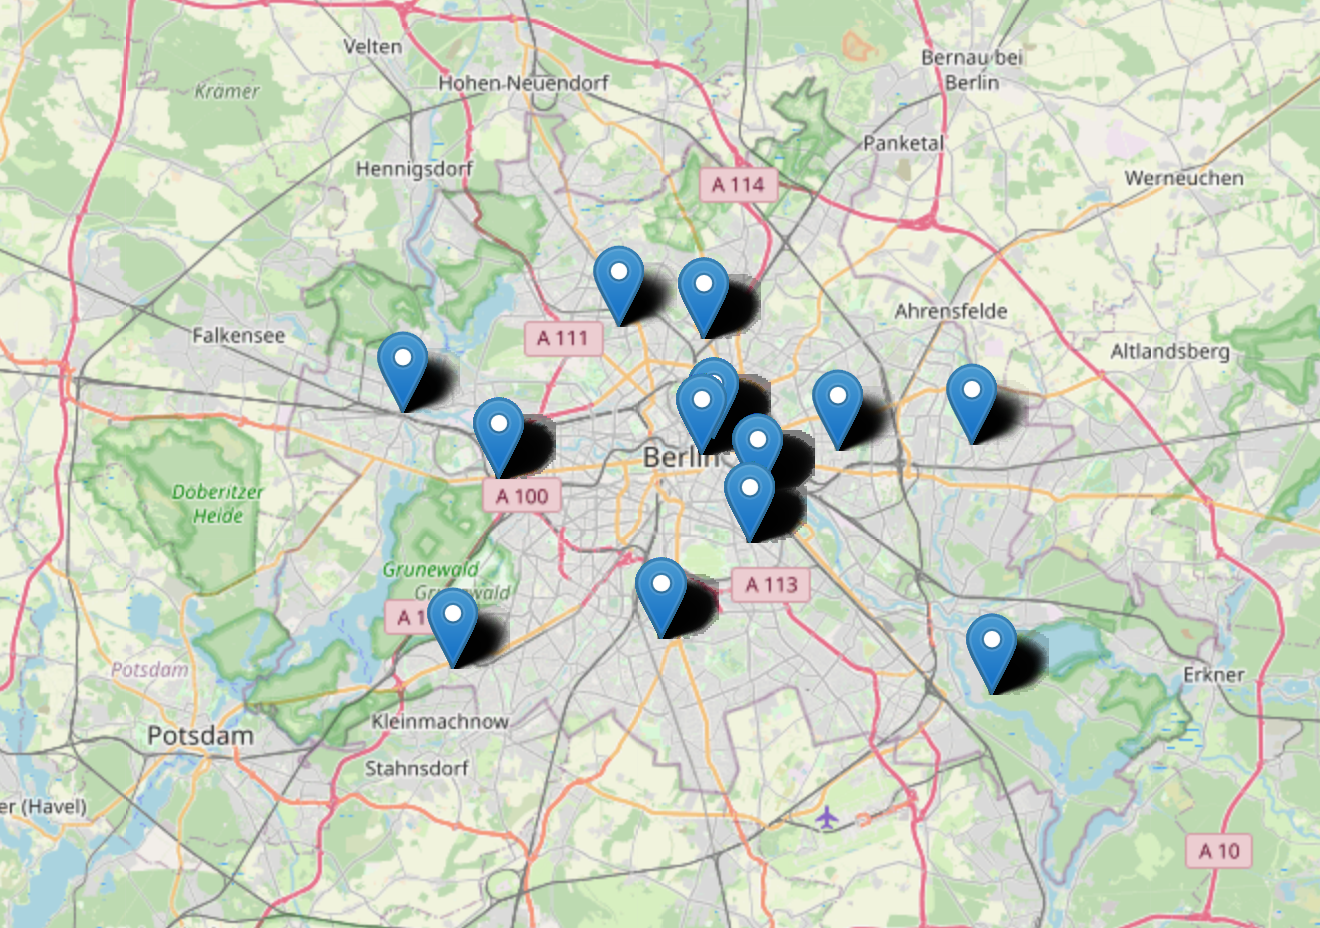